# Project 7: IOT Device Identification | Telling devices appart using Gradient Boosted Trees
- Identified different IOT devices based on metrics associated with the same
- Cross validation and Grid Search for model perforance evaluation

In [49]:
#First, we call the libraries we need for initial processing
#I'll merge training and testing sets to have more control over the test/train data ratio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
train_data = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-for-Cybersecurity-Cookbook/master/Chapter05/IoT%20Device%20Type%20Identification%20Using%20Machine%20Learning/iot_devices_train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-for-Cybersecurity-Cookbook/master/Chapter05/IoT%20Device%20Type%20Identification%20Using%20Machine%20Learning/iot_devices_test.csv')
all_data = train_data.append(test_data)
all_data.to_csv('IOT Data.csv')
all_data.head()

C:\Users\Ivan\AppData\Local\Temp\ipykernel_17352\2458507087.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = train_data.append(test_data)


,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,9,5,5,1213,743,0.713924,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
1,9,5,5,1213,743,1.806874,668,0,0,0.6890,...,0,0,0,1,0,0,0,0,0,security_camera
2,9,5,5,1213,743,0.103124,668,0,0,0.9852,...,0,0,0,1,0,0,0,0,0,security_camera
3,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
4,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera


In [51]:
#Taking a look at the data length
len(all_data)

1900

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'security_camera'),
  Text(1, 0, 'TV'),
  Text(2, 0, 'smoke_detector'),
  Text(3, 0, 'thermostat'),
  Text(4, 0, 'water_sensor'),
  Text(5, 0, 'watch'),
  Text(6, 0, 'baby_monitor'),
  Text(7, 0, 'motion_sensor'),
  Text(8, 0, 'lights'),
  Text(9, 0, 'socket')])

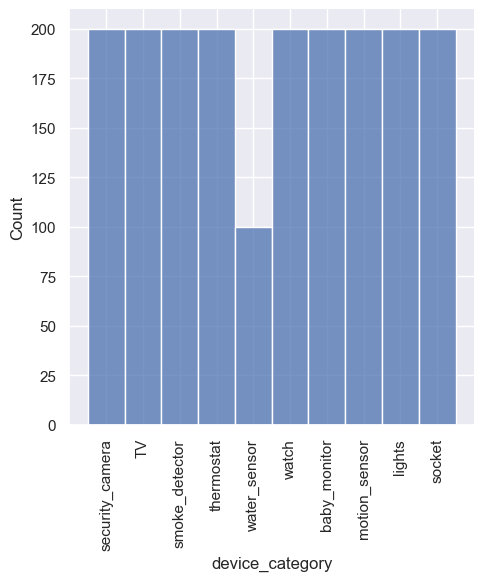

In [52]:
#Checking how balanced categories are
sns.displot(all_data['device_category'])
plt.xticks(rotation=90)

In [53]:
#Mapped data labels to a number in order to feed this data into the model
device_mapper = {
'security_camera':0,
'TV':1,
'smoke_detector':2,
'thermostat':3,
'water_sensor':4,
'watch':5,
'baby_monitor':6,
'motion_sensor':7,
'lights':8,
'socket':9
}
all_data['device_category'] = all_data['device_category'].map(device_mapper)

In [54]:
#Defining train variables and target variable
X = all_data.drop(['device_category'],axis=1)
y = all_data['device_category']

In [55]:
#Splitting data between train and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=101)

In [56]:
#Importin preprocessing lbirary as well as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed= scaler.transform(X_test)

{'max_depth': 3, 'n_estimators': 200}
{'mean_fit_time': array([11.36688664, 25.33994305, 47.56575353, 57.22968271, 66.84832106,
       18.00750556, 37.15443256, 64.72606292, 71.33766983, 79.46462245,
       33.52359276, 64.26488373, 75.39816635, 76.71407371, 70.22131329]), 'std_fit_time': array([0.1634266 , 0.67410429, 1.32632671, 1.58655135, 1.20925804,
       0.35690766, 1.16606246, 1.37980046, 1.57691833, 0.66720414,
       0.3987389 , 1.1801247 , 3.36568362, 3.36849034, 8.4689729 ]), 'mean_score_time': array([0.0033999 , 0.00349987, 0.00649893, 0.00700037, 0.00817728,
       0.00337799, 0.00550003, 0.00919921, 0.00979991, 0.01070054,
       0.00650003, 0.01139953, 0.01259933, 0.01459992, 0.01119964]), 'std_score_time': array([0.00269005, 0.00049985, 0.00128511, 0.00089431, 0.00075687,
       0.00068027, 0.00067102, 0.00098016, 0.00060024, 0.0009    ,
       0.00080627, 0.00101957, 0.00080096, 0.00427105, 0.00087104]), 'param_max_depth': masked_array(data=[3, 3, 3, 3, 3, 5, 5, 5, 5,

<AxesSubplot:>

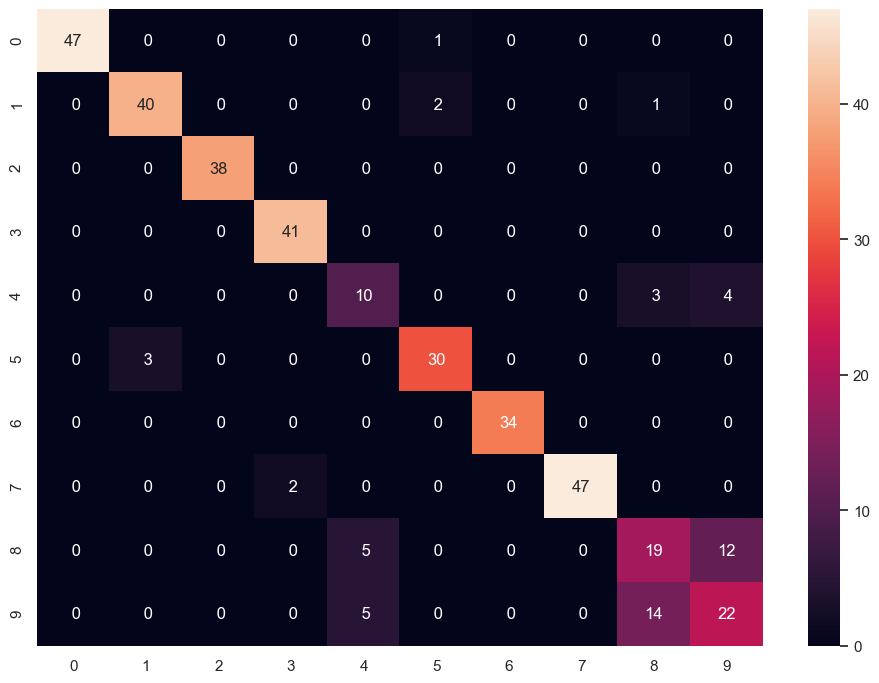

In [57]:
#We define a GBT model 

#Gradient Boosted trees
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
params = {
    'n_estimators': [50,100,200,250,300],
    'max_depth':[3,5,10]
}
grid = GridSearchCV(estimator=model,param_grid=params, cv=10,n_jobs=-1)
# fitting the model for grid search 
grid.fit(X_train_transformed, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
y_pred = grid.predict(X_test_transformed) 

#get scores
print(grid.cv_results_) 
   
# print classification report 
print(classification_report(y_test, y_pred))

#print confussion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='2g')



In [58]:
# print classification report 
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.93      0.93      0.93        43
           2       1.00      1.00      1.00        38
           3       0.95      1.00      0.98        41
           4       0.50      0.59      0.54        17
           5       0.91      0.91      0.91        33
           6       1.00      1.00      1.00        34
           7       1.00      0.96      0.98        49
           8       0.51      0.53      0.52        36
           9       0.58      0.54      0.56        41

    accuracy                           0.86       380
   macro avg       0.84      0.84      0.84       380
weighted avg       0.87      0.86      0.86       380

